Saving breast-cancer.csv to breast-cancer (1).csv
Linear SVM Accuracy: 0.956140350877193
RBF SVM Accuracy: 0.9736842105263158

Confusion Matrix (Linear):
 [[68  3]
 [ 2 41]]

Confusion Matrix (RBF):
 [[70  1]
 [ 2 41]]

CV Accuracy (Linear): 0.9701443875174661
CV Accuracy (RBF): 0.9736376339077782


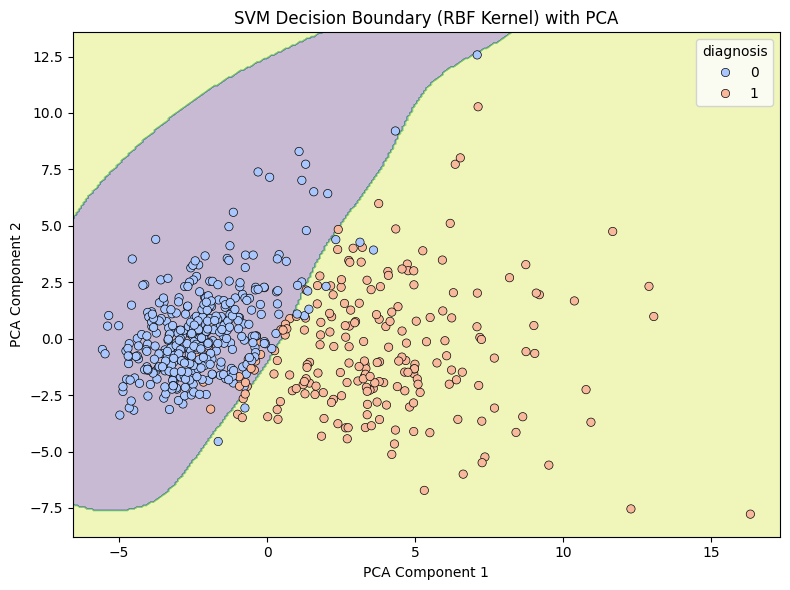

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from google.colab import files
uploaded =files.upload()

df = pd.read_csv("breast-cancer.csv")
df = df.drop(columns=['id'])
df.dropna(inplace=True)

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
svm_linear = SVC(kernel='linear', C=1)
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nConfusion Matrix (Linear):\n", confusion_matrix(y_test, y_pred_linear))
print("\nConfusion Matrix (RBF):\n", confusion_matrix(y_test, y_pred_rbf))
cv_linear = cross_val_score(svm_linear, X_scaled, y, cv=5).mean()
cv_rbf = cross_val_score(svm_rbf, X_scaled, y, cv=5).mean()
print("\nCV Accuracy (Linear):", cv_linear)
print("CV Accuracy (RBF):", cv_rbf)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

svm_vis = SVC(kernel='rbf', C=1, gamma='scale')
svm_vis.fit(X_pca, y)

xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 300),
                     np.linspace(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 300))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', edgecolor='k')
plt.title("SVM Decision Boundary (RBF Kernel) with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()



